
БАЗОВАЯ МОДЕЛЬ (100 нейронов в 1 слое)
      MSE       R2  Итерации
12.255836 0.832876       782

СРАВНЕНИЕ АРХИТЕКТУР:
      MSE       R2  Итерации    Архитектура
18.692216 0.745108      1376          (10,)
16.090846 0.780581       649          (50,)
12.255836 0.832876       782         (100,)
11.889995 0.837865       472       (50, 50)
13.814943 0.811616       147  (100, 50, 25)
11.186581 0.847457       161 (150, 100, 50)


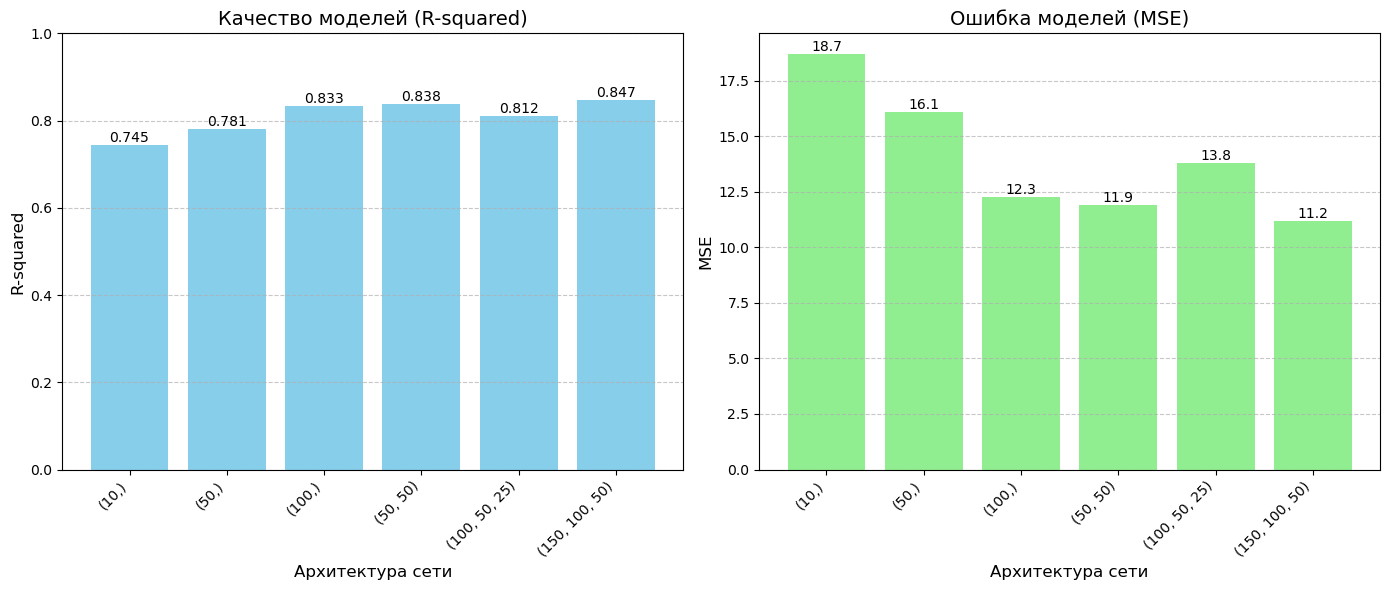


ЛУЧШАЯ АРХИТЕКТУРА СЕТИ
      MSE       R2  Итерации    Архитектура
11.186581 0.847457       161 (150, 100, 50)


In [4]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Настройки отображения
pd.set_option('display.max_columns', None)
warnings.filterwarnings("ignore", category=UserWarning)


def load_and_prepare_data():
    """Загрузка и подготовка данных"""
    data = pd.read_csv('BostonHousing.csv')
    X = data.drop('medv', axis=1)
    y = data['medv']
    return train_test_split(X, y, test_size=0.2, random_state=42)


def evaluate_model(model, X_test, y_test):
    """Оценка модели и вывод метрик"""
    y_pred = model.predict(X_test)
    return {
        "MSE": mean_squared_error(y_test, y_pred),
        "R2": r2_score(y_test, y_pred),
        "Итерации": model.n_iter_
    }


def print_results(title, metrics):
    """Вывод результатов в удобном формате"""
    print(f"\n{title}")
    print("=" * 60)
    print(pd.DataFrame([metrics]).to_string(index=False))
    print("=" * 60)


def plot_results(architectures, results):
    """Визуализация результатов сравнения архитектур"""
    plt.figure(figsize=(14, 6))

    # График R2
    plt.subplot(1, 2, 1)
    bars = plt.bar([str(x) for x in architectures], [x['R2'] for x in results], color='skyblue')
    plt.title('Качество моделей (R-squared)', fontsize=14)
    plt.xlabel('Архитектура сети', fontsize=12)
    plt.ylabel('R-squared', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.ylim(0, 1)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2., height, f'{height:.3f}',
                 ha='center', va='bottom')

    # График MSE
    plt.subplot(1, 2, 2)
    bars = plt.bar([str(x) for x in architectures], [x['MSE'] for x in results], color='lightgreen')
    plt.title('Ошибка моделей (MSE)', fontsize=14)
    plt.xlabel('Архитектура сети', fontsize=12)
    plt.ylabel('MSE', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2., height, f'{height:.1f}',
                 ha='center', va='bottom')

    plt.tight_layout()
    plt.show()


# Загрузка и подготовка данных
X_train, X_test, y_train, y_test = load_and_prepare_data()
# Масштабирование данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Базовая модель
base_model = MLPRegressor(
    hidden_layer_sizes=(100,),
    activation='relu',
    solver='adam',
    max_iter=2000,
    early_stopping=True,
    validation_fraction=0.2,
    random_state=42
)
base_model.fit(X_train_scaled, y_train)
base_metrics = evaluate_model(base_model, X_test_scaled, y_test)
print_results("БАЗОВАЯ МОДЕЛЬ (100 нейронов в 1 слое)", base_metrics)
# Исследование различных архитектур
architectures = [
    (10,), (50,), (100,),
    (50, 50), (100, 50, 25), (150, 100, 50)
]
results = []
for arch in architectures:
    model = MLPRegressor(
        hidden_layer_sizes=arch,
        activation='relu',
        solver='adam',
        max_iter=2000,
        early_stopping=True,
        validation_fraction=0.2,
        random_state=42
    )
    model.fit(X_train_scaled, y_train)
    metrics = evaluate_model(model, X_test_scaled, y_test)
    metrics["Архитектура"] = str(arch)
    results.append(metrics)

# Вывод результатов
print("\nСРАВНЕНИЕ АРХИТЕКТУР:")
print("=" * 60)
print(pd.DataFrame(results).to_string(index=False))
print("=" * 60)
# Визуализация
plot_results(architectures, results)
# Лучшая модель
best_model = max(results, key=lambda x: x['R2'])
print_results("ЛУЧШАЯ АРХИТЕКТУРА СЕТИ", best_model)
